In [168]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [169]:
# Manufacturing Dataset consists of the following columns:

# 1. Temperature (°C)	
# 2. Pressure (kPa)	
# 3. Temperature x Pressure	
# 4. Material Fusion Metric	
# 5. Material Transformation Metric	
# 6. Quality Rating: Target Column

In [170]:
df = pd.read_csv('E:\\Data_Analysis_Datasets\\manufacturing_xgr.csv')

In [171]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [172]:
df.shape

(3957, 6)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [174]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


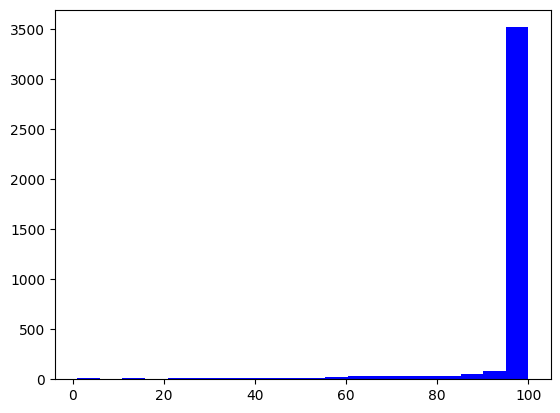

In [175]:
plt.hist(df['Quality Rating'], bins=20, color='blue')
plt.show()

In [176]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

### checking data for outliers

In [177]:
def check_outlier(column):
    plt.figure(figsize=(6,4))
    sns.boxplot(df[column])
    plt.xlabel(column, fontsize=12)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.show()


# df.boxplot()
# # Rotate x-axis labels
# plt.xticks(rotation=90)
# plt.show()

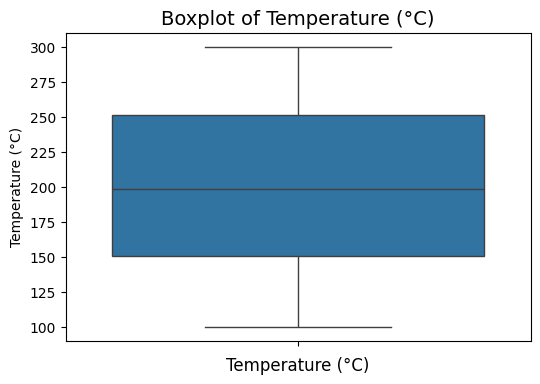

In [178]:
check_outlier('Temperature (°C)')

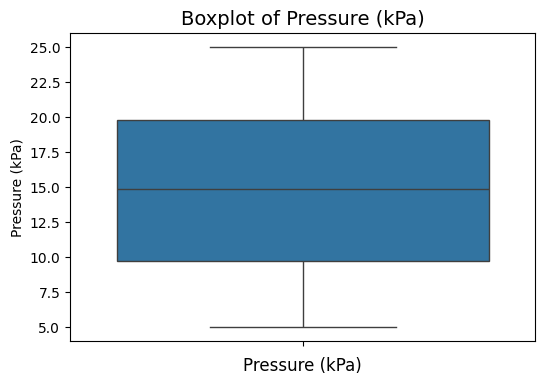

In [179]:
check_outlier('Pressure (kPa)')

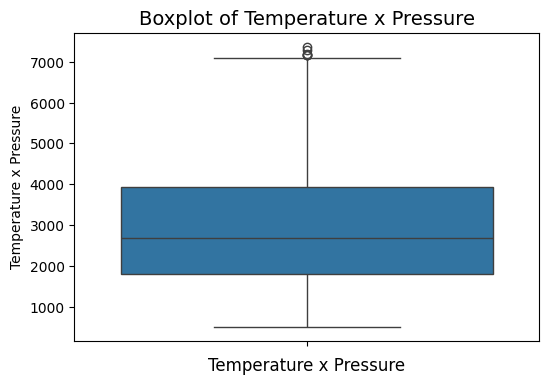

In [180]:
check_outlier('Temperature x Pressure')

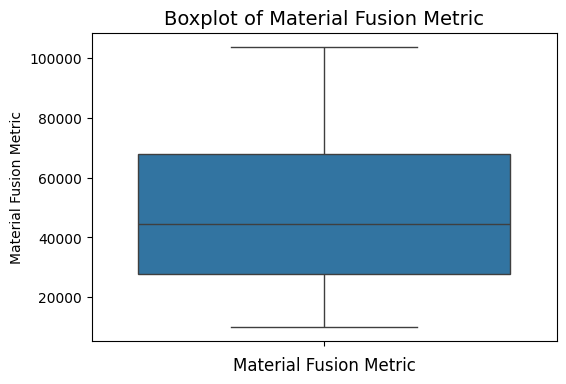

In [181]:
check_outlier('Material Fusion Metric')

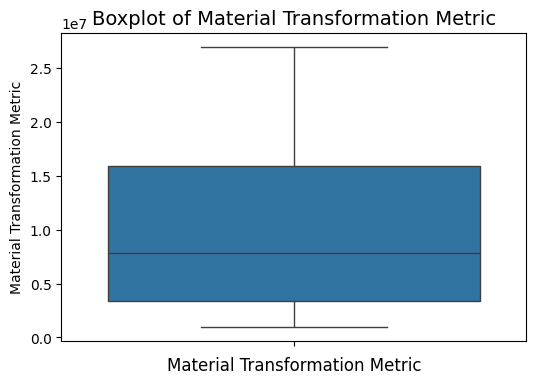

In [182]:
check_outlier('Material Transformation Metric')
# check_outlier('Quality Rating')

In [183]:
df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


<Axes: >

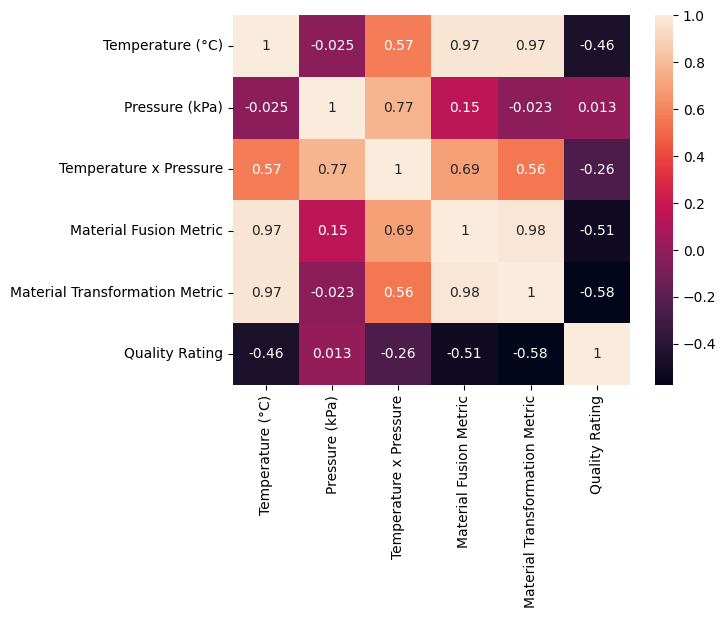

In [184]:
# check corelation between numbers
sns.heatmap(df.corr(), annot=True)

- Material Fusion Metric & Material Transformation Metric high corelation with Temperature 
- Material Fusion Metric corelate with Material Transformation Metric

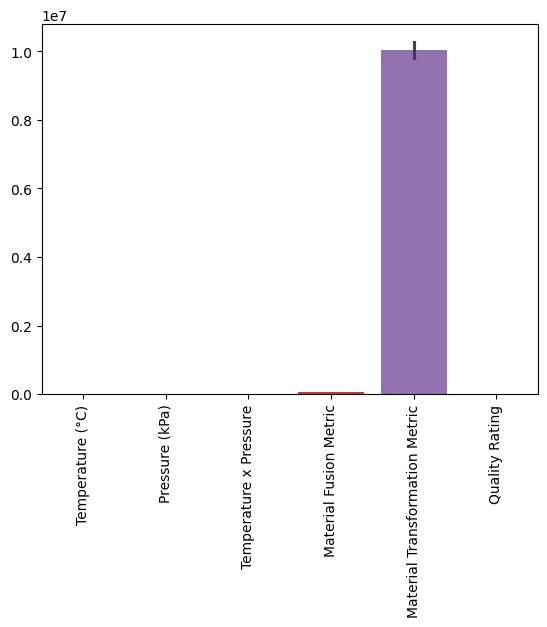

In [185]:
sns.barplot(df)
plt.xticks(rotation=90)
plt.show()

In [186]:
# Train Test Split

In [187]:
x = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [189]:
X_test.shape, y_test.shape

((792, 5), (792,))

In [190]:
X_train.shape, y_train.shape

((3165, 5), (3165,))

In [191]:
# parameter grid
param = [{
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3,4,5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'n_estimators': [50]
}]

In [192]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [193]:
xgr = XGBRegressor()
cv = GridSearchCV(estimator=xgr, param_grid=param, cv=5, scoring='r2', verbose=5)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 3/5] END colsampl

,estimator,"XGBRegressor(...bda=None, ...)"
,param_grid,"[{'colsample_bytree': [0.8, 0.9], 'learning_rate': [0.1, 0.2, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50], ...}]"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [194]:
cross_val_score(xgr, X_train, y_train)

array([0.99983343, 0.99977036, 0.99980705, 0.99976466, 0.99986173])

In [195]:
cross_val_score(xgr, X_train, y_train).mean()

np.float64(0.999807445502776)

In [196]:
results = pd.DataFrame(cv.cv_results_)
results.sort_values('mean_test_score', inplace=True, ascending=False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.042099,0.000817,0.002829,0.000031,0.9,0.2,5,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999819,0.999836,0.999816,0.999784,0.999880,0.999827,0.000031,1
10,0.040733,0.001341,0.002652,0.000185,0.8,0.2,5,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999819,0.999836,0.999816,0.999784,0.999880,0.999827,0.000031,1
11,0.043691,0.002515,0.002828,0.000392,0.8,0.2,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999784,0.999784,0.999723,0.999860,0.999895,0.999809,0.000061,3
29,0.042902,0.000673,0.002791,0.000036,0.9,0.2,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999784,0.999784,0.999723,0.999860,0.999895,0.999809,0.000061,3
8,0.037367,0.001565,0.002587,0.000112,0.8,0.2,4,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999821,0.999810,0.999757,0.999754,0.999833,0.999795,0.000033,5
26,0.038630,0.002305,0.002829,0.000040,0.9,0.2,4,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999821,0.999810,0.999757,0.999754,0.999833,0.999795,0.000033,5
27,0.042568,0.004061,0.003100,0.000267,0.9,0.2,4,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.999767,0.999775,0.999690,0.999833,0.999860,0.999785,0.000059,7
9,0.038093,0.001332,0.002596,0.000176,0.8,0.2,4,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.999767,0.999775,0.999690,0.999833,0.999860,0.999785,0.000059,7
17,0.064506,0.013004,0.003912,0.000635,0.8,0.3,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.3...",0.999808,0.999683,0.999607,0.999754,0.999882,0.999747,0.000095,9
35,0.046103,0.001586,0.002678,0.000132,0.9,0.3,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.3...",0.999808,0.999683,0.999607,0.999754,0.999882,0.999747,0.000095,9


In [197]:
print(f'Best Parameters:\n {cv.best_params_}')

Best Parameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [198]:
xge = XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8)
xgr.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [199]:
y_pred

array([99.99654  , 99.99654  , 99.52494  , 99.99654  , 99.52494  ,
       95.97161  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99347  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.6724   , 99.99654  , 63.292515 , 99.99654  , 99.99654  ,
       99.90313  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 99.99654  , 51.101955 , 99.99654  , 99.99654  ,
       74.7037   , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 68.599434 , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 98.20502  , 99.94231  , 98.18253  , 99.99654  ,
       89.240326 , 99.99654  , 99.99654  , 99.99654  , 99.6724   ,
       99.99654  , 99.90313  , 99.99654  , 62.35458  , 99.99654  ,
       60.32723  , 99.99654  , 99.99654  , 99.99654  , 99.41851  ,
       99.99654  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.90313  , 99.99654  , 97.084435 , 99.99654  , 99.9908

In [200]:
xgr.feature_importances_

array([9.9967200e-01, 1.5527131e-04, 5.9254537e-05, 1.0928153e-04,
       4.2480947e-06], dtype=float32)

In [201]:
print("R2 Score")
r2_score(y_test, y_pred)

R2 Score


0.9997708349098915

In [202]:
print("Mean Absolute Error")
mean_absolute_error(y_test, y_pred)

Mean Absolute Error


0.059915634897470184

In [203]:
print("Mean Squared Error")
np.sqrt(mean_squared_error(y_test, y_pred))

Mean Squared Error


np.float64(0.20043113235770796)

In [204]:
print("Mean Absolute Percentage Error")
mean_absolute_percentage_error(y_test, y_pred)

Mean Absolute Percentage Error


0.0013456106395507467

# Get important features

In [205]:
importances = pd.DataFrame(xgr.feature_importances_)
importances['features'] = list(x.columns)
importances.columns = ['importance', 'features']
importances.sort_values(by='importance', ascending=True, inplace=True)
importances.head(10)

,importance,features
4,0.000004,Material Transformation Metric
2,0.000059,Temperature x Pressure
3,0.000109,Material Fusion Metric
1,0.000155,Pressure (kPa)
0,0.999672,Temperature (°C)


<BarContainer object of 5 artists>

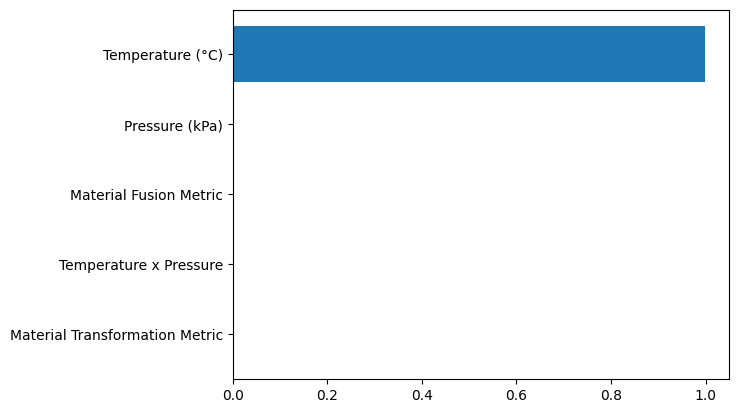

In [206]:
plt.barh(importances.features, importances.importance)

# Retrain and evaluated the model

In [207]:
X_train

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
3713,195.047668,10.725532,2091.990056,39277.426200,7.420199e+06
713,191.281913,20.549397,3930.727882,45266.322135,6.998348e+06
3819,178.227142,24.033257,4283.378732,45646.462194,5.660792e+06
3584,150.036001,15.002019,2250.842973,25887.164865,3.377206e+06
2294,197.686618,14.180148,2803.225454,41931.294556,7.725392e+06
...,...,...,...,...,...
835,195.876910,11.015577,2157.697202,39704.426320,7.515238e+06
3264,137.036400,14.808613,2029.319036,22026.430148,2.573184e+06
1653,205.663025,23.757125,4885.962265,55705.825363,8.698422e+06
2607,272.433253,8.157178,2222.286575,74762.652564,2.021990e+07


In [208]:
x_test

,Temperature (°C)
3256,158.637458
142,187.172985
2623,263.449717
3741,178.757649
2858,263.411397
...,...
3003,270.311559
3159,292.976416
3541,212.604767
2265,254.690934


In [209]:
# x_train = X_train[['Temperature (°C)', 'Pressure (kPa)']]
# x_test = X_test[['Temperature (°C)', 'Pressure (kPa)']]

x_train = X_train[['Temperature (°C)']]
x_test = X_test[['Temperature (°C)']]

In [210]:
x_train

,Temperature (°C)
3713,195.047668
713,191.281913
3819,178.227142
3584,150.036001
2294,197.686618
...,...
835,195.876910
3264,137.036400
1653,205.663025
2607,272.433253


In [211]:
x_test, x_train

(      Temperature (°C)
 3256        158.637458
 142         187.172985
 2623        263.449717
 3741        178.757649
 2858        263.411397
 ...                ...
 3003        270.311559
 3159        292.976416
 3541        212.604767
 2265        254.690934
 3860        199.261472
 
 [792 rows x 1 columns],
       Temperature (°C)
 3713        195.047668
 713         191.281913
 3819        178.227142
 3584        150.036001
 2294        197.686618
 ...                ...
 835         195.876910
 3264        137.036400
 1653        205.663025
 2607        272.433253
 2732        251.353121
 
 [3165 rows x 1 columns])

In [212]:
xge = XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8)
xgr.fit(x_train, y_train)
y_pred = xgr.predict(x_test)

In [213]:
print("R2 Score")
print(r2_score(y_test, y_pred))
print(" ")

print("Mean Absolute Error")
print(mean_absolute_error(y_test, y_pred))
print(" ")

print("Mean Squared Error")
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(" ")

print("Mean Absolute Percentage Error")
print(mean_absolute_percentage_error(y_test, y_pred))

R2 Score
0.9999137044399511
 
Mean Absolute Error
0.022815424021737505
 
Mean Squared Error
0.12299435401709471
 
Mean Absolute Percentage Error
0.0008444169440938254


In [214]:
importances = pd.DataFrame(xgr.feature_importances_)
# importances['features'] = ['Temperature (°C)','Material Transformation Metric']
importances['features'] = ['Temperature (°C)']
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)


,importance,feature
0,1.0,Temperature (°C)


# Random Forest Regressor

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
param_r = [{
    'n_estimators': [100, 200, 500],        # number of trees
    'max_depth': [None, 5, 10, 20],         # depth of each tree
    'min_samples_split': [2, 5, 10],        # min samples to split a node
    'min_samples_leaf': [1, 2, 4],          # min samples per leaf
    'max_features': ['auto', 'sqrt', 'log2'] # number of features to consider at split
}]

In [222]:
random_regressor = RandomForestRegressor()
cvr = GridSearchCV(random_regressor, 
                   param_grid=param_r, 
                   cv=5,  # 5-fold cross-validation
                   verbose=2, # show progress 
                   scoring='r2' # for regression (use 'accuracy' for classification)
                  )
cvr.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

,estimator,RandomForestRegressor()
,param_grid,"[{'max_depth': [None, 5, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}]"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [224]:
# Best parameters
print("Best Parameters:", cvr.best_params_)
print("Best Score:", cvr.best_score_)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9996641806418559


In [ ]:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.